In [187]:
#Data from https://github.com/CSSEGISandData/COVID-19

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)

dfc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

print("dfc")
display(dfc.head(6))
print("dfd")
display(dfd.head())

dfc


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,55,56,58,69,77,82,84,93,112,113
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,0,0,0,2,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,100,127,174,239,286,316,316,452,475,513
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,22,0,0,30,30,30,37,40,42,43
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6,6,6,7,8,10,12,12,12,12


dfd


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,2,3,3,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,3,6,8,11,12,15,18,20,21
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,1,1


In [188]:
#Transpose the data so the dates all become a column and can easily be converted into a date field
#We will later transpose them back that dates are again the columns
confirmed_st_date = dfc.drop(columns=['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_']).groupby( ['Province_State']).sum().transpose()
confirmed_st_date.index = pd.to_datetime(confirmed_st_date.index)
confirmed_us_date = dfc.drop(columns=['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Lat','Long_']).groupby( ['Country_Region']).sum().transpose()
confirmed_us_date.index = pd.to_datetime(confirmed_us_date.index)
confirmed_county_date = dfc.drop(columns=['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_']).groupby( ['Admin2']).sum().transpose()
confirmed_county_date.index = pd.to_datetime(confirmed_county_date.index)

deaths_st_date = dfd.drop(columns=['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Population']).groupby( ['Province_State']).sum().transpose()
deaths_st_date.index = pd.to_datetime(deaths_st_date.index)
deaths_us_date = dfd.drop(columns=['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Lat','Long_','Population']).groupby( ['Country_Region']).sum().transpose()
deaths_us_date.index = pd.to_datetime(deaths_us_date.index)
deaths_county_date = dfd.drop(columns=['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Population']).groupby( ['Admin2']).sum().transpose()
deaths_county_date.index = pd.to_datetime(deaths_county_date.index)

#print("Confirmed Cases by date")
#display(confirmed_st_date.head())
#display(confirmed_us_date.head())
#display(cofirmed_county_date.head())

#Transpose back so the dates are columns and then get just Texas
confirmed_st = confirmed_st_date.transpose()
confirmed_us = confirmed_us_date.transpose()
confirmed_county = confirmed_county_date.transpose()

print("Confirmed Cases by state")
display(confirmed_st.head())
print("Confirmed Cases US")
display(confirmed_us.head())
print("Confirmed Cases by county")
display(confirmed_county.head())

#deaths_st = deaths_st_date.transpose()
#deaths_us = deaths_us_date.transpose()
#deaths_county = deaths_county_date.transpose()


Confirmed Cases by state


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,694,825,899,987,1060,1233,1495,1614,1765,1952
Alaska,0,0,0,0,0,0,0,0,0,0,...,85,102,114,119,132,143,157,171,185,137
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,773,919,1157,1289,1530,1715,1937,2187,2486,2732
Arkansas,0,0,0,0,0,0,0,0,0,0,...,409,426,473,523,584,643,704,743,837,875


Confirmed Cases US


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Country_Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,121478,140886,161807,188172,213362,243453,275582,308845,337065,366607


Confirmed Cases by county


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Admin2,,,,,,,,,,,,,,,,,,,,,
Abbeville,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,6,6,6,6,6
Acadia,0,0,0,0,0,0,0,0,0,0,...,9,9,11,39,47,61,72,65,75,79
Accomack,0,0,0,0,0,0,0,0,0,0,...,2,3,6,7,7,10,8,8,11,11
Ada,0,0,0,0,0,0,0,0,0,0,...,76,92,113,195,195,312,307,360,385,402
Adair,0,0,0,0,0,0,0,0,0,0,...,5,6,6,7,12,16,21,28,32,34


In [189]:
confirmed_tx = confirmed_st.iloc[:,-15:].loc[['Texas']]
confirmed_travis = confirmed_county.iloc[:,-15:].loc[['Travis']]
confirmed_us = confirmed_us.iloc[:,-15:].loc[['US']]

deaths_tx = deaths_st.iloc[:,-15:].loc[['Texas']]
deaths_travis = deaths_county.iloc[:,-15:].loc[['Travis']]
deaths_us = deaths_us.iloc[:,-15:].loc[['US']]

print("Confirmed Cases for Texas")
display(confirmed_tx)
display(confirmed_tx.shape)
print("Confirmed Cases for Travis")
display(confirmed_travis)
display(confirmed_travis.shape)
print("Confirmed Cases for US")
display(confirmed_us)
display(confirmed_us.shape)

print("Deaths for Texas")
display(deaths_tx)
display(deaths_tx.shape)
print("Deaths for Travis")
display(deaths_travis)
display(deaths_travis.shape)
print("Deaths for US")
display(deaths_us)
display(deaths_us.shape)

Confirmed Cases for Texas


,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Province_State,,,,,,,,,,,,,,,
Texas,758,955,1229,1563,1937,2455,2792,3147,3809,4355,5069,5734,6556,7209,8043


(1, 15)

Confirmed Cases for Travis


,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Admin2,,,,,,,,,,,,,,,
Travis,79,86,98,119,160,179,200,206,244,244,351,351,430,484,502


(1, 15)

Confirmed Cases for US


,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Country_Region,,,,,,,,,,,,,,,
US,43663,53736,65778,83836,101657,121478,140886,161807,188172,213362,243453,275582,308845,337065,366607


(1, 15)

Deaths for Texas


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Province_State,,,,,,,,,,,,,,,
Texas,643,758,955,1229,1563,1937,2455,2792,3147,3809,4355,5069,5734,6556,7209


(1, 15)

Deaths for Travis


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Admin2,,,,,,,,,,,,,,,
Travis,62,79,86,98,119,160,179,200,206,244,244,351,351,430,484


(1, 15)

Deaths for US


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Country_Region,,,,,,,,,,,,,,,
US,33621,43663,53736,65778,83836,101657,121478,140886,161807,188172,213362,243453,275582,308845,337065


(1, 15)

In [190]:
confirmed_chg_tx = confirmed_tx.transpose().pct_change().transpose()
confirmed_chg_tx = confirmed_chg_tx.replace([np.inf, -np.inf], np.nan).fillna(0)
display(confirmed_chg_tx)

confirmed_chg_us2 = confirmed_us.transpose().pct_change().transpose()
confirmed_chg_us2 = confirmed_chg_us2.replace([np.inf, -np.inf], np.nan).fillna(0)
display(confirmed_chg_us2)

confirmed_chg_travis = confirmed_travis.transpose().pct_change().transpose()
confirmed_chg_travis = confirmed_chg_travis.replace([np.inf, -np.inf], np.nan).fillna(0)
display(confirmed_chg_travis)

confirmed_chg_tx = confirmed_chg_tx.mul(100).transpose().tail(20)
confirmed_chg_us2 = confirmed_chg_us2.mul(100).transpose().tail(20)
confirmed_chg_travis = confirmed_chg_travis.mul(100).transpose().tail(20)

deaths_chg_tx = deaths_tx.transpose().pct_change().transpose()
deaths_chg_tx = deaths_chg_tx.replace([np.inf, -np.inf], np.nan).fillna(0)
display(deaths_chg_tx)

deaths_chg_us2 = deaths_us.transpose().pct_change().transpose()
deaths_chg_us2 = deaths_chg_us2.replace([np.inf, -np.inf], np.nan).fillna(0)
display(deaths_chg_us2)

deaths_chg_travis = deaths_travis.transpose().pct_change().transpose()
deaths_chg_travis = deaths_chg_travis.replace([np.inf, -np.inf], np.nan).fillna(0)
display(deaths_chg_travis)

deaths_chg_tx = deaths_chg_tx.mul(100).transpose().tail(20)
deaths_chg_us2 = deaths_chg_us2.mul(100).transpose().tail(20)
deaths_chg_travis = deaths_chg_travis.mul(100).transpose().tail(20)

,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Province_State,,,,,,,,,,,,,,,
Texas,0.0,0.259894,0.286911,0.271766,0.239283,0.267424,0.137271,0.127149,0.210359,0.143345,0.163949,0.13119,0.143355,0.099603,0.115689


,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Country_Region,,,,,,,,,,,,,,,
US,0.0,0.230699,0.224096,0.274529,0.21257,0.194979,0.159766,0.148496,0.162941,0.133867,0.141033,0.131972,0.120701,0.091373,0.087645


,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00
Admin2,,,,,,,,,,,,,,,
Travis,0.0,0.088608,0.139535,0.214286,0.344538,0.11875,0.117318,0.03,0.184466,0.0,0.438525,0.0,0.225071,0.125581,0.03719


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Province_State,,,,,,,,,,,,,,,
Texas,0.0,0.178849,0.259894,0.286911,0.271766,0.239283,0.267424,0.137271,0.127149,0.210359,0.143345,0.163949,0.13119,0.143355,0.099603


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Country_Region,,,,,,,,,,,,,,,
US,0.0,0.298682,0.230699,0.224096,0.274529,0.21257,0.194979,0.159766,0.148496,0.162941,0.133867,0.141033,0.131972,0.120701,0.091373


,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00
Admin2,,,,,,,,,,,,,,,
Travis,0.0,0.274194,0.088608,0.139535,0.214286,0.344538,0.11875,0.117318,0.03,0.184466,0.0,0.438525,0.0,0.225071,0.125581


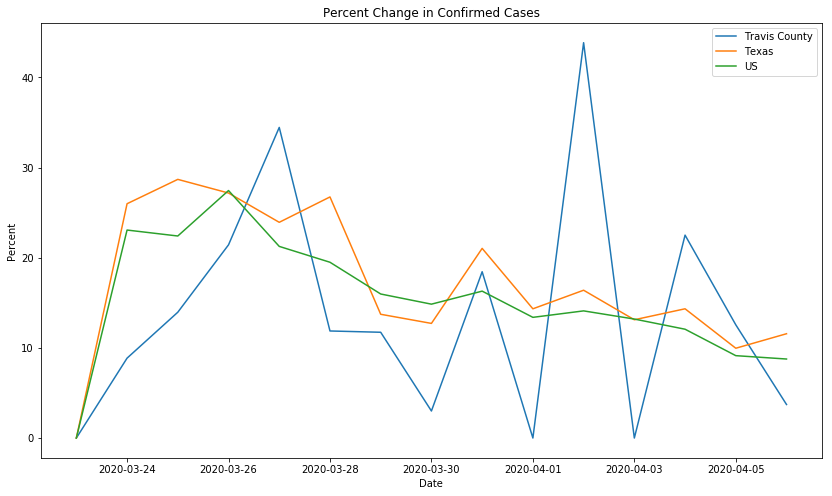

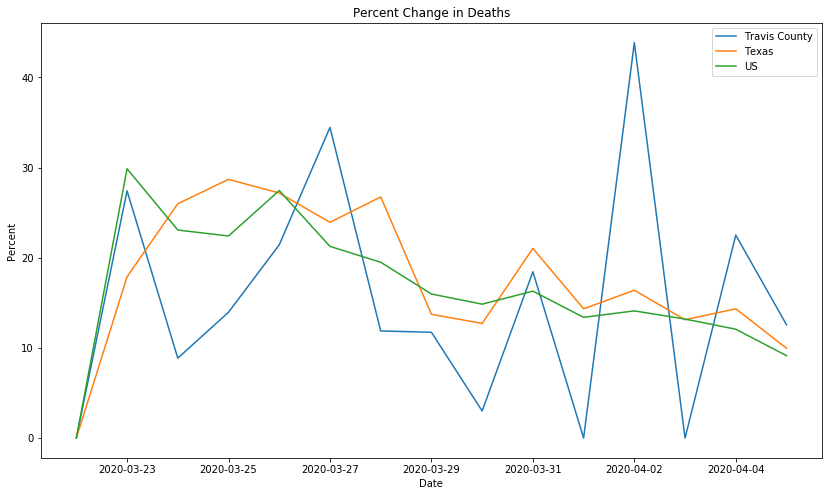

In [191]:
#Plot US, Texas, and Travis County day-to-day percentage change in confirmed cases
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Percent Change in Confirmed Cases')
plt.plot(confirmed_chg_travis, label="Travis County")
plt.plot(confirmed_chg_tx, label="Texas")
plt.plot(confirmed_chg_us2, label="US")
plt.legend()
plt.show()

#Plot US, Texas, and Travis County day-to-day percentage change in deaths
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Percent Change in Deaths')
plt.plot(deaths_chg_travis, label="Travis County")
plt.plot(deaths_chg_tx, label="Texas")
plt.plot(deaths_chg_us2, label="US")
plt.legend()
plt.show()

In [192]:
''' Examples of trendline code to experiment with tomorrow
import seaborn as sns

# Your DataFrame here 

# sns.lmplot(x='year',y='value',data=data,fit_reg=True) 

sns.regplot(x='year',y='value',data=data, fit_reg=True) 

x = pd.Series(np.arange(50))
y = pd.Series(10 + (2 * x + np.random.randint(-5, + 5, 50)))
regression = pd.ols(y=y, x=x)
regression.summary

trend = regression.predict(beta=regression.beta, x=x[20:]) # slicing to only use last 30 points
data = pd.DataFrame(index=x, data={'y': y, 'trend': trend})
data.plot() # add kwargs for title and other layout/design aspects
plt.show() # or plt.gcf().savefig(path)

# plot the data itself
pylab.plot(x,y,‘o’)
# calc the trendline (it is simply a linear fitting)
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),“r–”)
# the line equation:
print “y=%.6fx+(%.6f)”%(z[0],z[1])

#You can easily use this method for any higher degree fitting. For example, a parabolic fit will be:
z = numpy.polyfit(x, y, 2)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-192-35f1ecab5db8>, line 29)